<a href="https://colab.research.google.com/github/Badslam/time-series/blob/main/LSTM(copasan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries and Test Splits

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

Load Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Umum .csv to Umum .csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Umum .csv']))

Exploratory Analysis

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tanggal   549 non-null    object 
 1   Terakhir  549 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


,Tanggal,Terakhir
0,1/4/2021,6011.46
1,31/03/2021,5985.52
2,30/03/2021,6071.44
3,29/03/2021,6166.82
4,26/03/2021,6195.56


In [8]:
df.describe()

,Terakhir
count,549.000000
mean,5827.088980
std,639.877599
min,3937.630000
25%,5176.100000
50%,6137.610000
75%,6306.800000
max,6547.880000


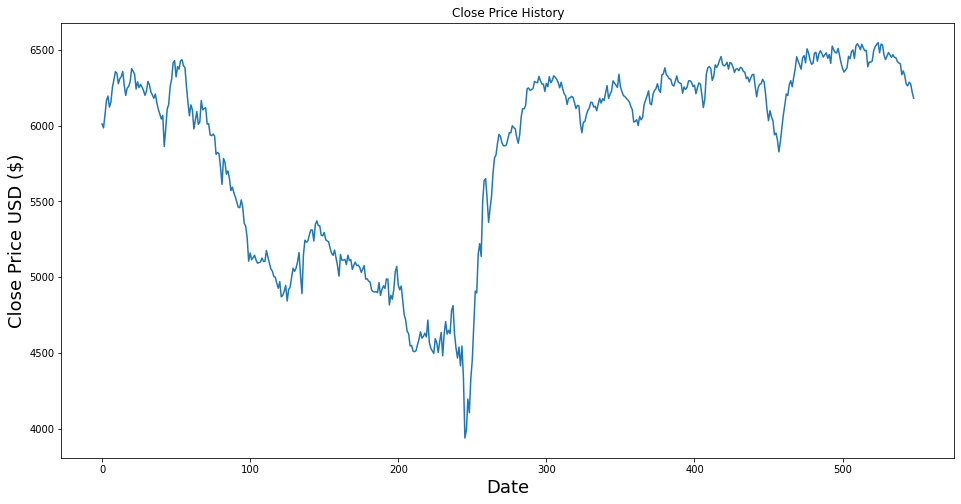

In [33]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Terakhir'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [34]:
# Convert the dataframe to a numpy array
dataset = df['Terakhir'].values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

522

In [38]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Terakhir'].values.reshape(-1, 1))

scaled_data

array([[0.79449478],
       [0.78455703],
       [0.81747342],
       [0.85401398],
       [0.86502442],
       [0.83718035],
       [0.84992242],
       [0.88691888],
       [0.90546882],
       [0.9265511 ],
       [0.92335983],
       [0.89631261],
       [0.90875204],
       [0.91433005],
       [0.92733646],
       [0.89150465],
       [0.86659132],
       [0.88529068],
       [0.88923283],
       [0.90151135],
       [0.93444306],
       [0.92771957],
       [0.91978929],
       [0.8827392 ],
       [0.90107078],
       [0.88628292],
       [0.89461929],
       [0.88791495],
       [0.87895795],
       [0.86684417],
       [0.87734891],
       [0.90212432],
       [0.89366536],
       [0.87535294],
       [0.86742649],
       [0.85970309],
       [0.87012355],
       [0.84823293],
       [0.83118092],
       [0.81989082],
       [0.80689972],
       [0.81597931],
       [0.73736998],
       [0.7822086 ],
       [0.83192798],
       [0.84380423],
       [0.88916387],
       [0.907

In [39]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.79449478, 0.78455703, 0.81747342, 0.85401398, 0.86502442,
       0.83718035, 0.84992242, 0.88691888, 0.90546882, 0.9265511 ,
       0.92335983, 0.89631261, 0.90875204, 0.91433005, 0.92733646,
       0.89150465, 0.86659132, 0.88529068, 0.88923283, 0.90151135,
       0.93444306, 0.92771957, 0.91978929, 0.8827392 , 0.90107078,
       0.88628292, 0.89461929, 0.88791495, 0.87895795, 0.86684417,
       0.87734891, 0.90212432, 0.89366536, 0.87535294, 0.86742649,
       0.85970309, 0.87012355, 0.84823293, 0.83118092, 0.81989082,
       0.80689972, 0.81597931, 0.73736998, 0.7822086 , 0.83192798,
       0.84380423, 0.88916387, 0.90776746, 0.94866775, 0.95474763,
       0.91341059, 0.93945024, 0.93315966, 0.95419213, 0.95683555,
       0.94168758, 0.93681065, 0.88888038, 0.84896083, 0.81526674])]
[0.8427200459726079]

[array([0.79449478, 0.78455703, 0.81747342, 0.85401398, 0.86502442,
       0.83718035, 0.84992242, 0.88691888, 0.90546882, 0.9265511 ,
       0.92335983, 0.89631261, 0.908

In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ["mae"])

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
462/462 [==============================] - 16s 30ms/step - loss: 0.0296 - mae: 0.1034
Epoch 2/5
462/462 [==============================] - 14s 30ms/step - loss: 0.0034 - mae: 0.0445
Epoch 3/5
462/462 [==============================] - 14s 30ms/step - loss: 0.0030 - mae: 0.0412
Epoch 4/5
462/462 [==============================] - 14s 30ms/step - loss: 0.0019 - mae: 0.0325
Epoch 5/5
462/462 [==============================] - 14s 30ms/step - loss: 0.0017 - mae: 0.0326
